In [1]:
#import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits

from DFDetect import DWFS_mrf, detect
import os

In [3]:
#Locations of needed files
band = 'G'
tile_name = 'tile_220.147_-1.424_SloanG'
DF_file = DWFS_mrf.tile_dir + tile_name + '_g.fits'
config_file = '/home/tbm33/projects/packages/DragonflyWideSurvey/df_decals_g.yaml'
decals_g_file = DWFS_mrf.decals_dir + tile_name + '_decals_cutout_g.fits'
decals_r_file = DWFS_mrf.decals_dir + tile_name + '_decals_cutout_r.fits'

#You don't need the mast catalog but might be worth downloading if you plan on running on multiple tiles
res = DWFS_mrf.run_mrf_tile(DF_file, band, config_file, './output/', hires_g_file = decals_g_file, hires_r_file = decals_r_file, mast_file = DWFS_mrf.master_mast_catalog, use_two_bands = True,save_fig = True)

using master MAST catalog
2021-04-22 17:52:55,779 Running Multi-Resolution Filtering (MRF) on "decals" and "df" images!
2021-04-22 17:52:55,786 Subtract BACKVAL=633.5 of Dragonfly image
2021-04-22 17:52:55,864 Magnify Dragonfly image with a factor of 3.0:
2021-04-22 17:52:57,509 Register high resolution image "/netb/dokkum/data/DWFS/decals_frames/tile_220.147_-1.424_SloanG_decals_cutout_g.fits" with "/netb/dokkum/data/DWFS/tile_frames/tile_220.147_-1.424_SloanG_g.fits"
2021-04-22 17:53:10,729 Register high resolution image "/netb/dokkum/data/DWFS/decals_frames/tile_220.147_-1.424_SloanG_decals_cutout_r.fits" with "/netb/dokkum/data/DWFS/tile_frames/tile_220.147_-1.424_SloanG_g.fits"
2021-04-22 17:53:23,974 Build flux models on high-resolution images: Blue band
2021-04-22 17:53:23,975     - sigma = 2.0, minarea = 5
2021-04-22 17:53:23,975     - deblend_cont = 0.00500, deblend_nthres = 32.0
2021-04-22 17:53:25,345     - Detect 6993 objects
2021-04-22 17:53:27,935 Build flux models on hig

ValueError: minvalue must be less than or equal to maxvalue

In [16]:
import importlib
importlib.reload(detect)

# Get table list from /home/tbm33/anaconda2/envs/py3/lib/python3.7/site-packages/unagi/data/pdr2_wide/pdr2_wide_tables.fits


<module 'DFDetect.detect' from '/home/tbm33/projects/packages/DragonflyWideSurvey/python/DFDetect/detect.py'>

test


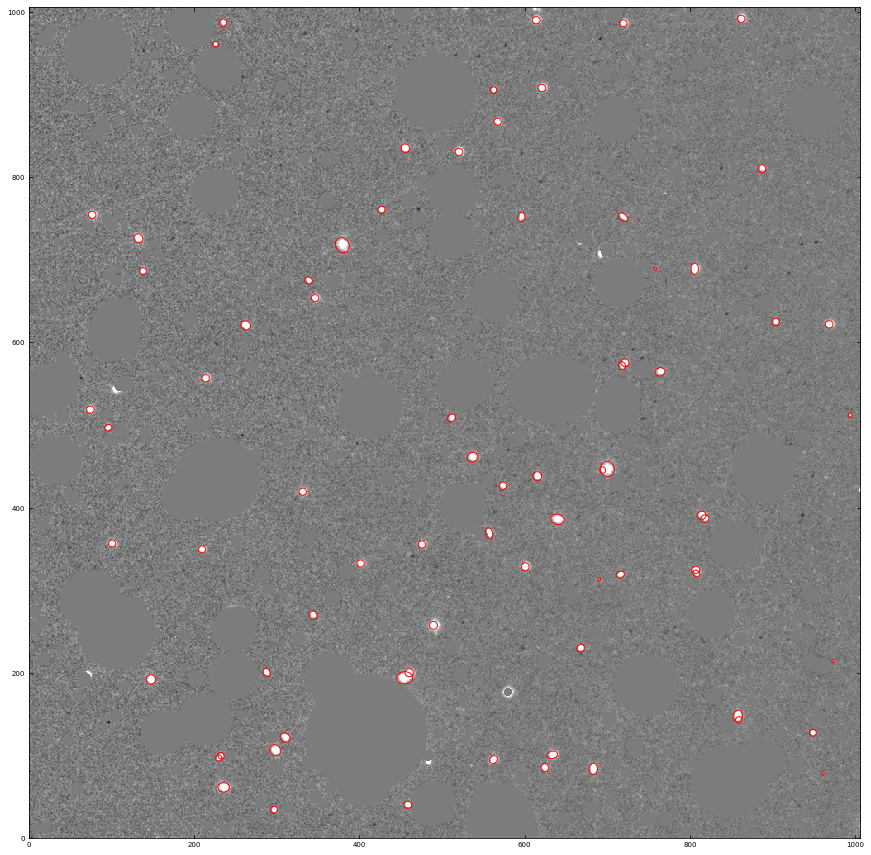

In [17]:
obj_cur = detect.detect_sources(res.lowres_final.image, 10, 'g',  res.lowres_final.wcs,search_radius = 3., mask = res.lowres_mask.image)
plt.show()

In [18]:
#There are 75 detected sources
obj_cur

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,dec,star_near,gal_near,star_mag,gal_spec_z,gal_log_ms,gal_photoobjid,gal_specobjid,gal_phot_z,gal_phot_z_err
0,35.468975,40,21,294,300,31,37,296.540260,33.946408,1.913070,...,1.051996,False,True,-99.00000,0.201536,11.254346,1237648705668514051,605756723910699008,0.198771,0.022762
1,30.918476,56,34,454,462,36,44,458.546321,40.003358,2.485269,...,1.056263,False,False,-99.00000,-99.000000,-99.000000,-99,-99,-99.000000,-99.000000
2,37.018486,136,64,228,243,56,66,235.549640,61.125809,5.538069,...,1.070837,False,True,-99.00000,0.087590,11.263986,1237651735239262575,605756998788605952,0.080789,0.008061
3,24.206852,5,0,961,962,77,79,961.384874,78.182076,0.236746,...,1.082938,True,False,21.65097,-99.000000,-99.000000,-99,-99,-99.000000,-99.000000
4,27.725925,77,42,620,629,80,89,624.340534,84.799475,2.468984,...,1.087420,False,True,-99.00000,0.033174,8.708776,1237651735239131366,605768818538604544,0.033886,0.006759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,40.125927,22,10,224,228,959,963,225.794562,960.916527,1.293809,...,1.695332,True,False,19.05539,-99.000000,-99.000000,-99,-99,-99.000000,-99.000000
71,40.624233,42,20,232,238,984,990,234.873005,986.971917,2.212964,...,1.713420,False,True,-99.00000,-99.000000,-99.000000,1237651753492611340,-99,0.206573,0.030889
72,28.405777,96,57,715,725,981,991,719.476835,986.433066,2.256509,...,1.713338,True,False,16.07673,-99.000000,-99.000000,-99,-99,-99.000000,-99.000000
73,30.706810,114,59,607,620,984,995,613.979454,990.080057,2.497775,...,1.715811,True,False,16.04058,-99.000000,-99.000000,-99,-99,-99.000000,-99.000000


In [19]:
#Sources w/ no counterpart
obj_no_sdss = obj_cur.query('star_near == False and gal_near == False').reset_index()
obj_no_sdss

,index,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,...,dec,star_near,gal_near,star_mag,gal_spec_z,gal_log_ms,gal_photoobjid,gal_specobjid,gal_phot_z,gal_phot_z_err
0,1,30.918476,56,34,454,462,36,44,458.546321,40.003358,...,1.056263,False,False,-99.0,-99.0,-99.0,-99,-99,-99.0,-99.0


# Retrieving cutout image in filter: g


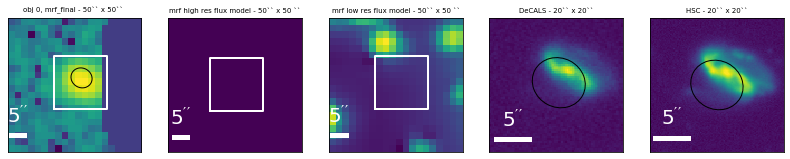

In [20]:
hr = detect.plot_cutouts(res,obj_no_sdss,decals_fits)
plt.show()

In [8]:
#Sources w/ gal counterpart at low z
obj_lowz = obj_cur.query('0 < gal_spec_z < 0.1 or (gal_near == True and gal_specobjid == -99 and gal_phot_z < 0.1)').reset_index()
obj_lowz

,index,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,...,dec,star_near,gal_near,star_mag,gal_spec_z,gal_log_ms,gal_photoobjid,gal_specobjid,gal_phot_z,gal_phot_z_err
0,2,37.018486,136,64,228,243,56,66,235.549640,61.125809,...,1.069795,False,True,-99.00000,0.087590,11.263986,1237651735239262575,605756998788605952,0.080789,0.008061
1,4,27.725925,77,42,620,629,80,89,624.340534,84.799475,...,1.086378,False,True,-99.00000,0.033174,8.708776,1237651735239131366,605768818538604544,0.033886,0.006759
2,5,26.846207,117,70,678,688,77,90,683.084208,83.543174,...,1.085527,False,True,-99.00000,0.091606,11.249259,1237651735239131334,348024600703035392,0.085253,0.012023
3,10,36.430225,116,52,293,304,101,112,297.974362,106.078977,...,1.101023,False,True,-99.00000,0.005721,8.186082,1237651735239262517,605759197811861504,0.470258,0.243306
4,11,36.266842,76,36,305,315,116,125,310.100645,121.719429,...,1.111884,True,True,21.40702,-99.000000,-99.000000,1237651752955740599,-99,0.052058,0.011163
5,15,38.086700,96,52,143,153,187,197,147.429636,191.837441,...,1.160480,False,True,-99.00000,0.067517,10.734609,1237651752955805853,605760572201396224,0.066502,0.009909
6,24,26.185226,57,32,712,720,315,322,715.883135,318.697515,...,1.248783,False,True,-99.00000,0.081582,10.324816,1237651752955609278,605794931939764224,0.097814,0.024715
7,50,37.097240,99,60,257,268,615,625,262.295698,620.539246,...,1.458083,False,True,-99.00000,0.044529,9.603924,1237651735776133324,605786685602555904,0.039462,0.007172
8,51,24.108395,49,26,901,907,621,628,903.976835,624.531316,...,1.461169,False,True,-99.00000,-99.000000,-99.000000,1237651735775936895,-99,0.064074,0.043015
9,58,33.570137,184,77,372,386,710,726,379.403689,717.908556,...,1.525729,False,True,-99.00000,0.005868,8.241547,1237651735776133483,605784211701393408,0.053181,0.045328


# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: g


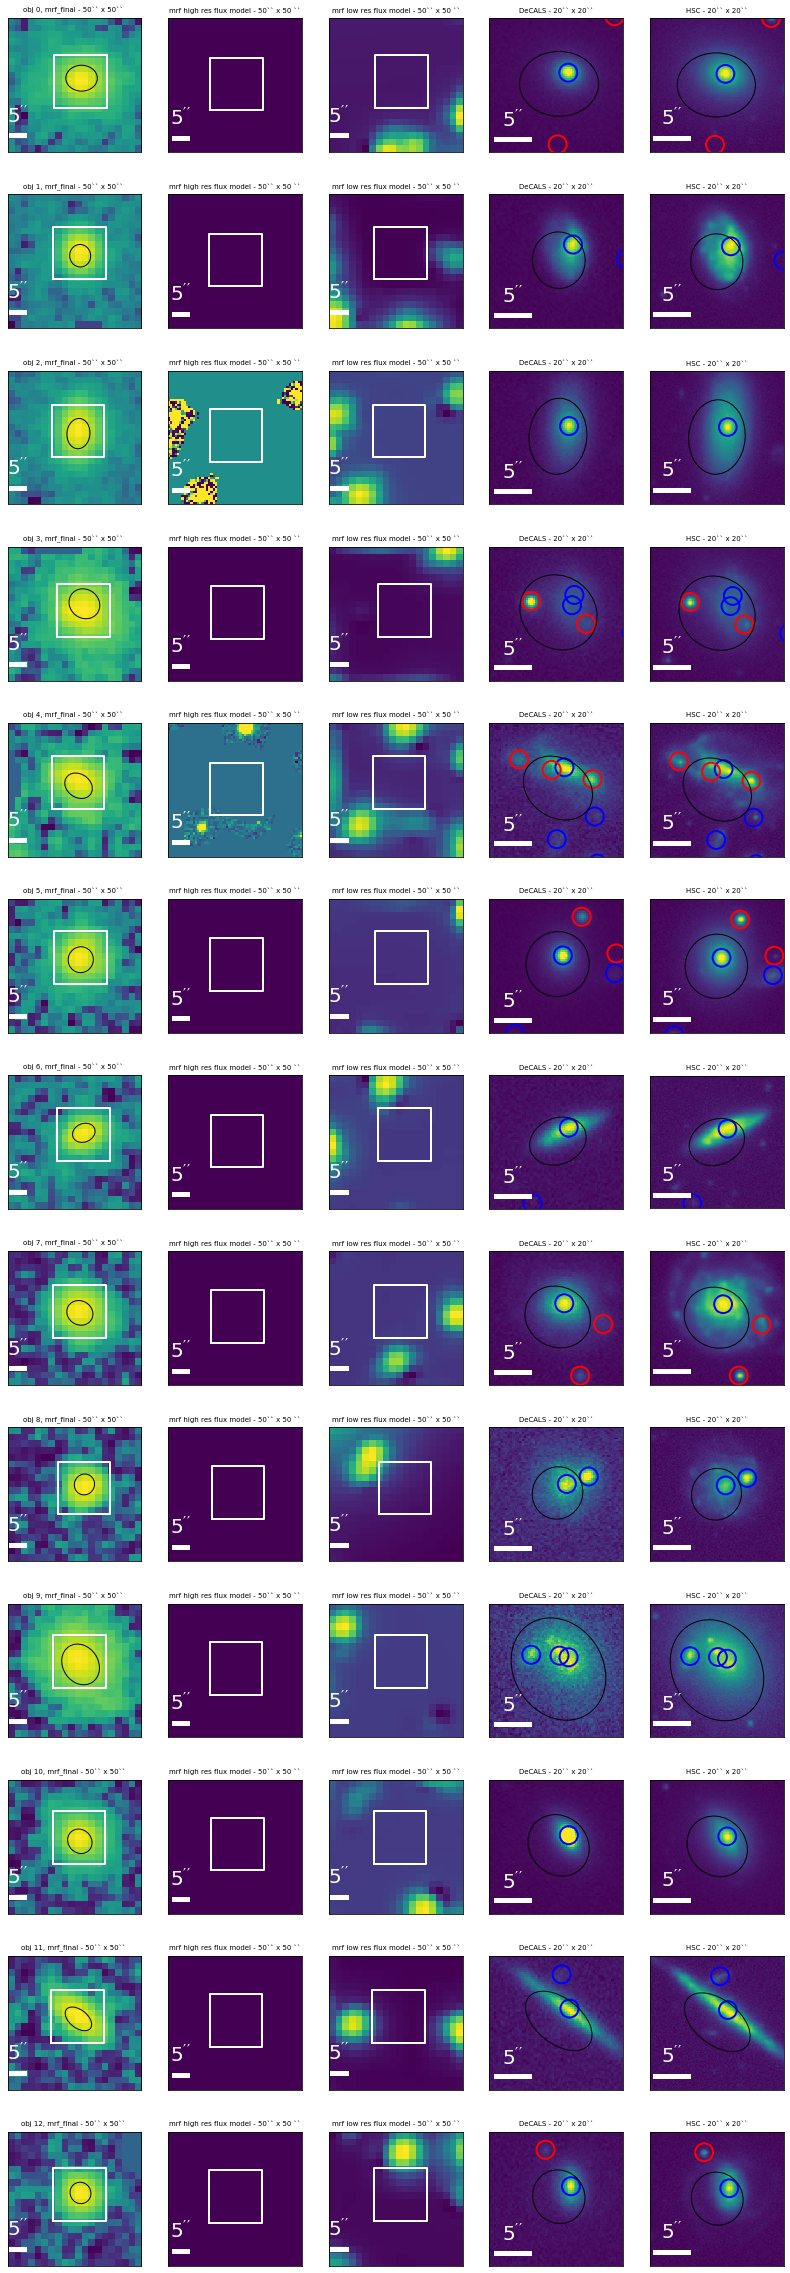

In [22]:
## Plot cutouts of low z sources, takes ~ 10-15 s per sources
fig = detect.plot_cutouts(res,obj_lowz,decals_fits)
plt.show()

In [9]:
obj_cur['peak_mu'] = -2.5*np.log10(obj_cur['peak']) + 27.3 + 5*np.log10(2.5)
obj_cur['q'] = obj_cur['b']/obj_cur['a']
obj_cur['C'] = obj_cur['peak']/obj_cur['flux']

In [10]:
obj_bkg_gal = obj_cur.query(' gal_spec_z > 0.1 or gal_phot_z > 0.1').reset_index()
obj_low_z_gal = obj_cur.query('0 < gal_spec_z < 0.05 or (gal_near == True and gal_specobjid == -99 and gal_phot_z < 0.05)').reset_index()
obj_star = obj_cur.query('star_near == True and gal_near == False and star_mag < 19').reset_index()

In [11]:
obj_cur.query('star_near == False and gal_near == False')

,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,star_mag,gal_spec_z,gal_log_ms,gal_photoobjid,gal_specobjid,gal_phot_z,gal_phot_z_err,peak_mu,q,C
1,30.918476,56,34,454,462,36,44,458.546321,40.003358,2.485269,...,-99.0,-99.0,-99.0,-99,-99,-99.0,-99.0,22.884641,0.907144,0.071258


In [12]:
obj_cur.keys()

Index(['thresh', 'npix', 'tnpix', 'xmin', 'xmax', 'ymin', 'ymax', 'x', 'y',
       'x2', 'y2', 'xy', 'errx2', 'erry2', 'errxy', 'a', 'b', 'theta', 'cxx',
       'cyy', 'cxy', 'cflux', 'flux', 'cpeak', 'peak', 'xcpeak', 'ycpeak',
       'xpeak', 'ypeak', 'flag', 'mask_phot', 'ra', 'dec', 'star_near',
       'gal_near', 'star_mag', 'gal_spec_z', 'gal_log_ms', 'gal_photoobjid',
       'gal_specobjid', 'gal_phot_z', 'gal_phot_z_err', 'peak_mu', 'q', 'C'],
      dtype='object')

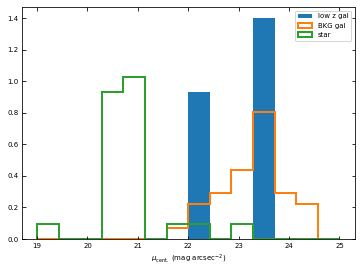

In [13]:
key_use = 'peak_mu'
bins = np.linspace(19,25,num = 15)
plt.hist(obj_low_z_gal[key_use], label = 'low z gal',density = True,bins = bins)
plt.hist(obj_bkg_gal[key_use], histtype = 'step', label = 'BKG gal', lw = 2,density = True,bins = bins)
plt.hist(obj_star[key_use], histtype = 'step', label = 'star', lw = 2,density = True,bins = bins)
plt.legend(loc = 0)
plt.xlabel(r'$\mu_{\rm cent.}$ (mag arcsec$^{-2}$)')
plt.show()

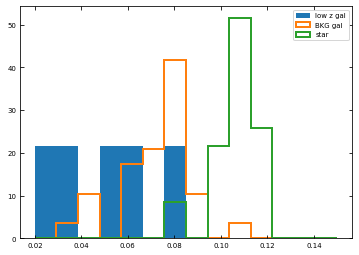

In [14]:
key_use = 'C'
bins = np.linspace(0.02,0.15, num = 15)
plt.hist(obj_low_z_gal[key_use], label = 'low z gal',density = True,bins = bins)
plt.hist(obj_bkg_gal[key_use], histtype = 'step', label = 'BKG gal', lw = 2,density = True,bins = bins)
plt.hist(obj_star[key_use], histtype = 'step', label = 'star', lw = 2,density = True,bins = bins)
plt.legend(loc = 0)
plt.show()

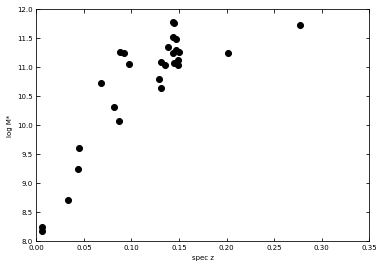

In [15]:
plt.plot(obj_cur['gal_spec_z'],obj_cur['gal_log_ms'], 'ko')
plt.xlim([0,0.35])
plt.ylim(8,12)
plt.xlabel('spec z')
plt.ylabel('log M*')
plt.show()